# **Lab5.1 : CNN Feature maps**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms


## Get VGG16 Pretrained model
Explore the VGG16 achitecture.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): ReLU(inplace=True)
    (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (20): ReLU(inplace=True)
    (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): ReLU(inplace=True)
    (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): ReLU(inplace=True)
    (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (27): ReLU(inplace=True)
    (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): ReLU(inplace=True)
    (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  )
)
```

</details>


In [ ]:
### START CODE HERE ###
vgg16 = models.vgg16(pretrained=True)

print(vgg16)
### END CODE HERE ###

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 133MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Explore all layers in feature extractor part.
[Read more.](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.named_modules:~:text=named_modules(memo%3DNone%2C%20prefix%3D%27%27%2C%20remove_duplicate%3DTrue))


<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
-------------------
0:Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
1:ReLU(inplace=True)
-------------------
2:Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
3:ReLU(inplace=True)
-------------------
4:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
...
28:Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
29:ReLU(inplace=True)
-------------------
30:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
```

</details>


In [ ]:
### START CODE HERE ###
for idx, m in enumerate(vgg16.features):
    print('-------------------')
    print(f'{idx}:{m}')

### END CODE HERE ###

-------------------
0:Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
1:ReLU(inplace=True)
-------------------
2:Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
3:ReLU(inplace=True)
-------------------
4:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
-------------------
5:Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
6:ReLU(inplace=True)
-------------------
7:Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
8:ReLU(inplace=True)
-------------------
9:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
-------------------
10:Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
11:ReLU(inplace=True)
-------------------
12:Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
13:ReLU(inplace=True)
-------------------
14

Examine weight and bias of first Convolution layer and ReLU layer. [Read more.](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html)
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
torch.Size([64, 3, 3, 3])
Kernel : 0
*************************************
Channel : 0
[[-0.5537306   0.1427047   0.5289615 ]
 [-0.58312404  0.35655147  0.76566225]
 [-0.69022113 -0.04801885  0.48409155]]
Min coefficients -0.69022113
-------------------------------------
Channel : 1
[[ 0.17548391  0.00986297 -0.08141315]
 [ 0.04408892 -0.07032251 -0.26035076]
 [ 0.13239175 -0.1727862  -0.1322633 ]]
Min coefficients -0.26035076
-------------------------------------
Channel : 2
[[ 0.31302562 -0.1659134  -0.42752257]
 [ 0.47518674 -0.08267727 -0.48699915]
 [ 0.63202524  0.01930757 -0.2775303 ]]
Min coefficients -0.48699915
-------------------------------------


Kernel : 1
*************************************
Channel : 0
[[ 0.23253721  0.12665984  0.1860546 ]
 [-0.42805314 -0.24348575  0.24628444]
 [-0.2506616   0.14177004 -0.0054864 ]]
Min coefficients -0.42805314
-------------------------------------
Channel : 1
[[-0.14076217 -0.21902554  0.15040672]
 [-0.84126675 -0.3517562   0.5639763 ]
 [-0.24194452  0.5192758   0.5391499 ]]
Min coefficients -0.84126675
-------------------------------------
Channel : 2
[[-0.31432396 -0.37047786 -0.13093661]
 [-0.47144184 -0.15503426  0.3458899 ]
 [ 0.05438393  0.5868277   0.49579924]]
Min coefficients -0.47144184
-------------------------------------

...
```

</details>

In [ ]:
### START CODE HERE ###
first_conv = vgg16.features[0]

first_relu = vgg16.features[1]

first_conv_data = first_conv.weight.data

first_conv_shape = first_conv_data.shape
print(first_conv_shape)

for kernel in range(first_conv_shape[0]):
  for channel in range(first_conv_shape[1]):
    print(f'Kernel : {kernel}')
    print('*' * 20)
    print(f'Channel : {channel}')
    print(first_conv_data[kernel][channel])
    print(f'Min coefficients {first_conv_data[kernel][channel].min()}')
    print('-' * 20)
### END CODE HERE ###

torch.Size([64, 3, 3, 3])
Kernel : 0
********************
Channel : 0
tensor([[-0.5537,  0.1427,  0.5290],
        [-0.5831,  0.3566,  0.7657],
        [-0.6902, -0.0480,  0.4841]])
Min coefficients -0.6902211308479309
--------------------
Kernel : 0
********************
Channel : 1
tensor([[ 0.1755,  0.0099, -0.0814],
        [ 0.0441, -0.0703, -0.2604],
        [ 0.1324, -0.1728, -0.1323]])
Min coefficients -0.26035076379776
--------------------
Kernel : 0
********************
Channel : 2
tensor([[ 0.3130, -0.1659, -0.4275],
        [ 0.4752, -0.0827, -0.4870],
        [ 0.6320,  0.0193, -0.2775]])
Min coefficients -0.48699915409088135
--------------------
Kernel : 1
********************
Channel : 0
tensor([[ 0.2325,  0.1267,  0.1861],
        [-0.4281, -0.2435,  0.2463],
        [-0.2507,  0.1418, -0.0055]])
Min coefficients -0.4280531406402588
--------------------
Kernel : 1
********************
Channel : 1
tensor([[-0.1408, -0.2190,  0.1504],
        [-0.8413, -0.3518,  0.5640],
 

In [ ]:
assert isinstance(first_conv, nn.Conv2d), "First layer should be a convolutional layer"
assert isinstance(first_relu, nn.ReLU), "Second layer should be a ReLU activation"
assert first_conv.weight.shape == (64, 3, 3, 3), "First layer weight shape should be (64, 3, 3, 3)"

Examine Biases
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Bias : Parameter containing:
tensor([ 0.4034,  0.3778,  0.4644, -0.3228,  0.3940, -0.3953,  0.3951, -0.5496,
         ...
         0.2300,  0.4979,  0.5553,  0.5230, -0.2182,  0.0117, -0.5516,  0.2108],
       requires_grad=True)
```

</details>

In [ ]:
### START CODE HERE ###
print("Bias :", first_conv.bias)
### END CODE HERE ###

Bias : Parameter containing:
tensor([ 0.4034,  0.3778,  0.4644, -0.3228,  0.3940, -0.3953,  0.3951, -0.5496,
         0.2693, -0.7602, -0.3508,  0.2334, -1.3239, -0.1694,  0.3938, -0.1026,
         0.0460, -0.6995,  0.1549,  0.5628,  0.3011,  0.3425,  0.1073,  0.4651,
         0.1295,  0.0788, -0.0492, -0.5638,  0.1465, -0.3890, -0.0715,  0.0649,
         0.2768,  0.3279,  0.5682, -1.2640, -0.8368, -0.9485,  0.1358,  0.2727,
         0.1841, -0.5325,  0.3507, -0.0827, -1.0248, -0.6912, -0.7711,  0.2612,
         0.4033, -0.4802, -0.3066,  0.5807, -1.3325,  0.4844, -0.8160,  0.2386,
         0.2300,  0.4979,  0.5553,  0.5230, -0.2182,  0.0117, -0.5516,  0.2108],
       requires_grad=True)


## Process the feature maps
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](attachment:image.png)

</details>

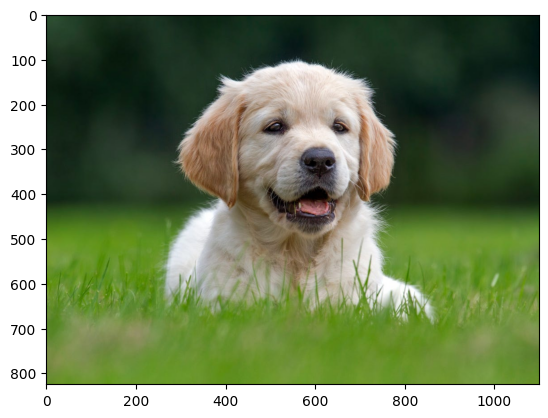

In [ ]:
### START CODE HERE ###
img = plt.imread("dog.jpg")
plt.imshow(img)

### END CODE HERE ###

Normalize the image using the mean and standard deviation values from the [VGG16 normalization parameters.](https://pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html)
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](attachment:image.png)

</details>

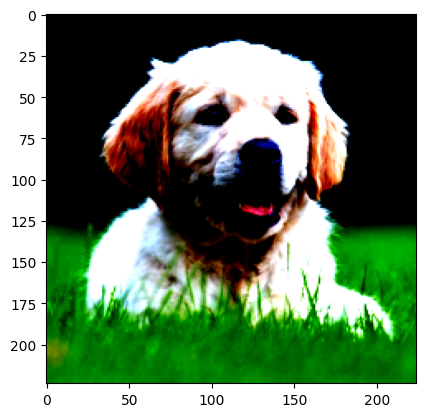

In [ ]:
### START CODE HERE ###
from PIL import Image
from torchvision.transforms.functional import InterpolationMode
preprocess = transforms.Compose([
        transforms.Resize(256, interpolation=InterpolationMode.BILINEAR),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
norm_img = preprocess(Image.fromarray(img))
plt.imshow(norm_img.permute(1, 2, 0))


### END CODE HERE ###

Convert the [NumPy image to a PyTorch tensor](https://pytorch.org/docs/stable/torch.html#:~:text=memory%2Dmapped%20file.-,from_numpy,-Creates%20a%20Tensor), ensuring it has the [correct dimensions and data type](https://pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html) for input to the first convolution layer.

In [ ]:
### START CODE HERE ###

# it's already pytorch tensor and ready to go to the model
print(type(norm_img))
print(norm_img.shape)

### END CODE HERE ###

<class 'torch.Tensor'>
torch.Size([3, 224, 224])


Complete the function below. <br>
The plot_featuremap function takes a set of feature maps and creates a grid of subplots, each displaying a single feature map.

In [ ]:
### START CODE HERE ###
def plot_featuremap(img, title):
    fig, axs = plt.subplots(8, 8, figsize=(15, 15))
    fig.suptitle(title, fontsize = 20)
    fig.tight_layout()

    for i in range(64):
        axs[i // 8, i % 8].imshow(img[i].detach().numpy(), cmap='gray')
        axs[i // 8, i % 8].set_title(i)
        axs[i // 8, i % 8].axis('off')
### END CODE HERE ###

Pass the image to the first convolutional layer and display the feature map output using your `plot_featuremap()` function.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](attachment:image.png)
</details>

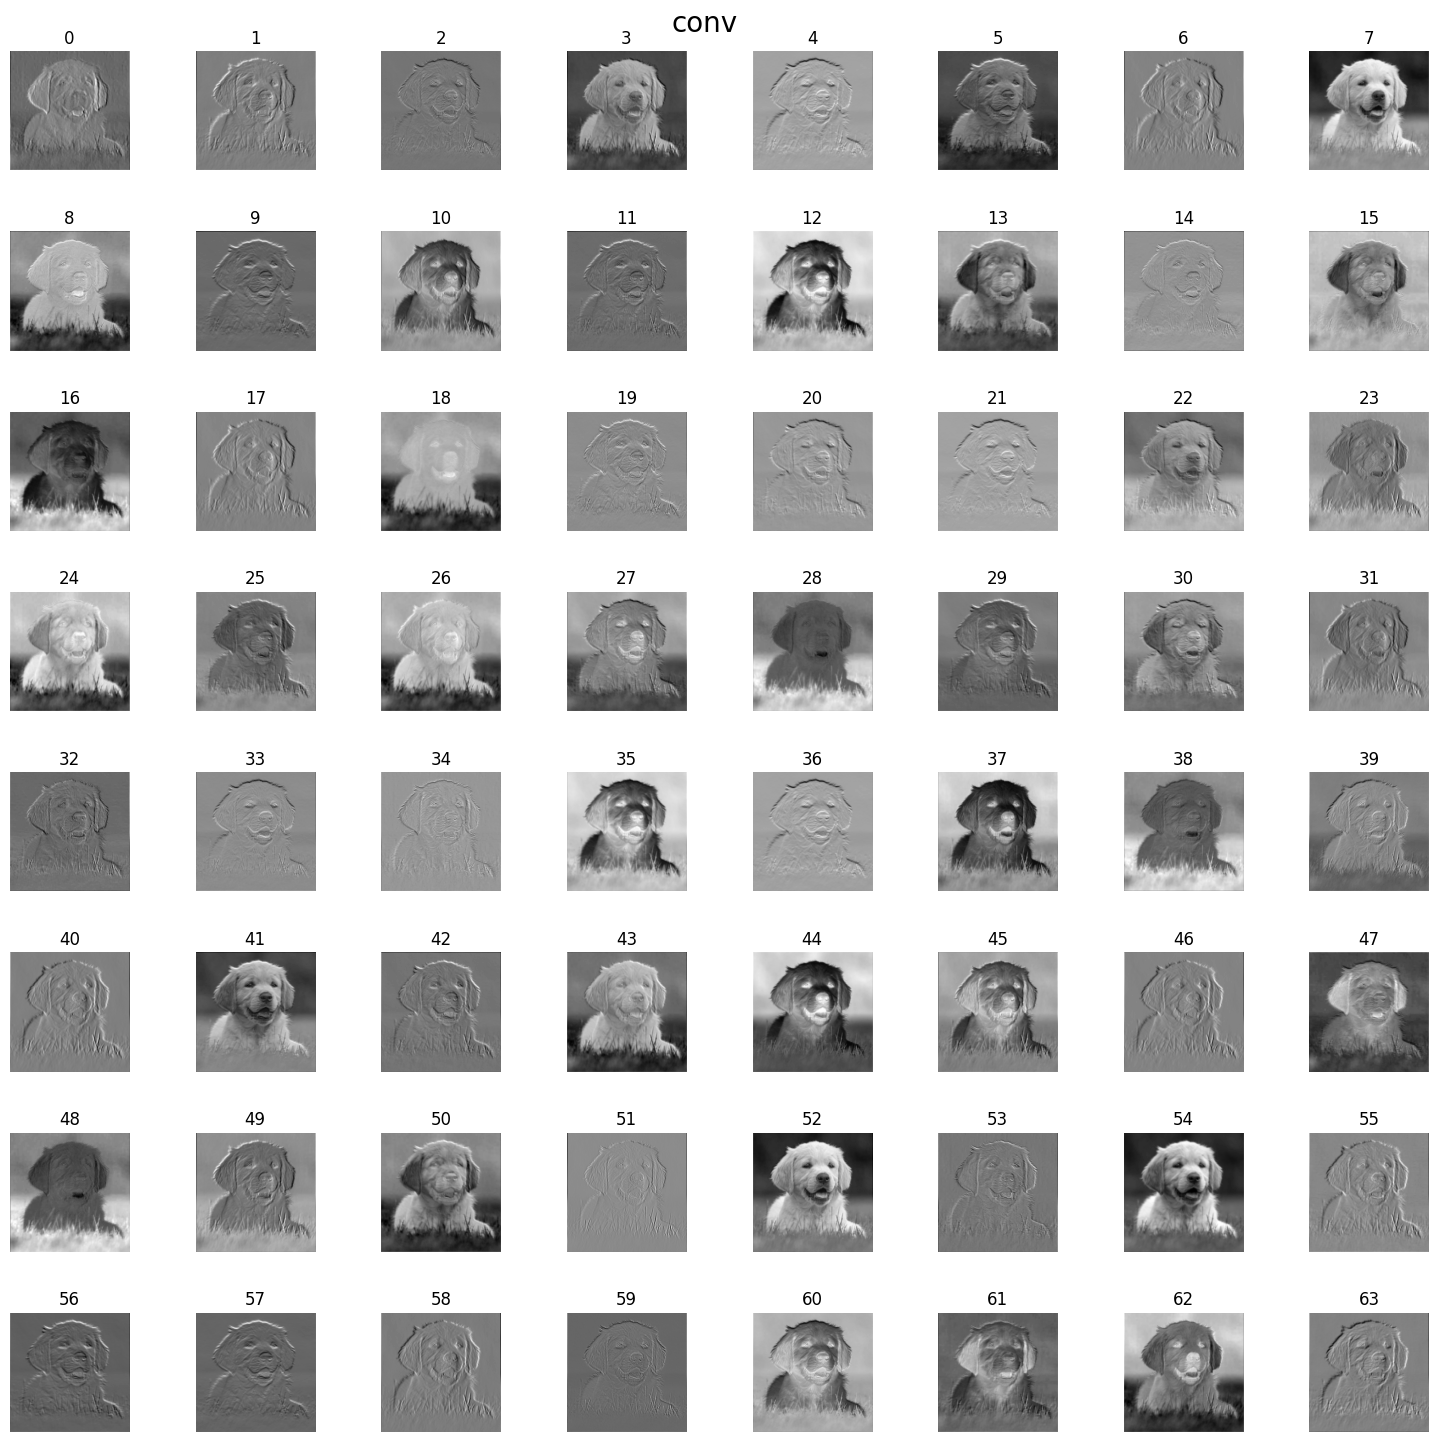

In [ ]:
### START CODE HERE ###

plot_featuremap(first_conv(norm_img), 'conv')

### END CODE HERE ###

Pass the image to the first ReLU layer and display the feature map output using your `plot_featuremap()` function.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](attachment:image.png)

</details>

In [ ]:
### START CODE HERE ###

plot_featuremap(first_relu(first_conv(norm_img)), 'relu')

### END CODE HERE ###

## Convolution 2D from scratch
Complete the function below

In [ ]:
### START CODE HERE ###
def convolution2d_helper(img, kernel, stride):
    h, w = img.shape
    kh, kw = kernel.shape
    sh, sw = stride
    oh = int((h - kh) / sh + 1)
    ow = int((w - kw) / sw + 1)
    output = np.zeros((oh, ow))
    for i in range(oh):
        for j in range(ow):
            output[i, j] = np.sum(img[i*sh:i*sh + kh, j*sw:j*sw + kw] * kernel)
    return output

def convolution2d_channel_helper(img, kernel, stride):
    output = np.zeros((224, 224))
    for i in range(3):
        output += convolution2d_helper(img[i], kernel[i], stride)
    return output

def convolution2d(img, kernels, padding, stride):
    print(img.shape)
    _, h, w = img.shape
    ph, pw = padding
    img = np.pad(img, ((0, 0), (ph, ph), (pw, pw)), 'constant')
    kernels = np.array(kernels)
    output = []
    for kernel in kernels:
        output.append(convolution2d_channel_helper(img, kernel, stride))
    return torch.from_numpy(np.array(output))

### END CODE HERE ###

Copy the weights and biases from `vgg16` and then use each kernel perform a 2D convolution using `convolution2d` and display the resulting feature map
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](attachment:image.png)

</details>

In [ ]:
### START CODE HERE ###

# plot_featuremap(convolution2d(norm_img, first_conv_data, first_conv.padding, first_conv.stride))

conv_output = convolution2d(norm_img, first_conv_data, first_conv.padding, first_conv.stride)

for i in range(64):
  conv_output[i] += first_conv.bias[i]

plot_featuremap(conv_output, 'conv')

### END CODE HERE ###

torch.Size([3, 224, 224])


After performing the `convolution2d` operation, apply the ReLU activation function to the output. Then, display the resulting feature map.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](attachment:image.png)

</details>

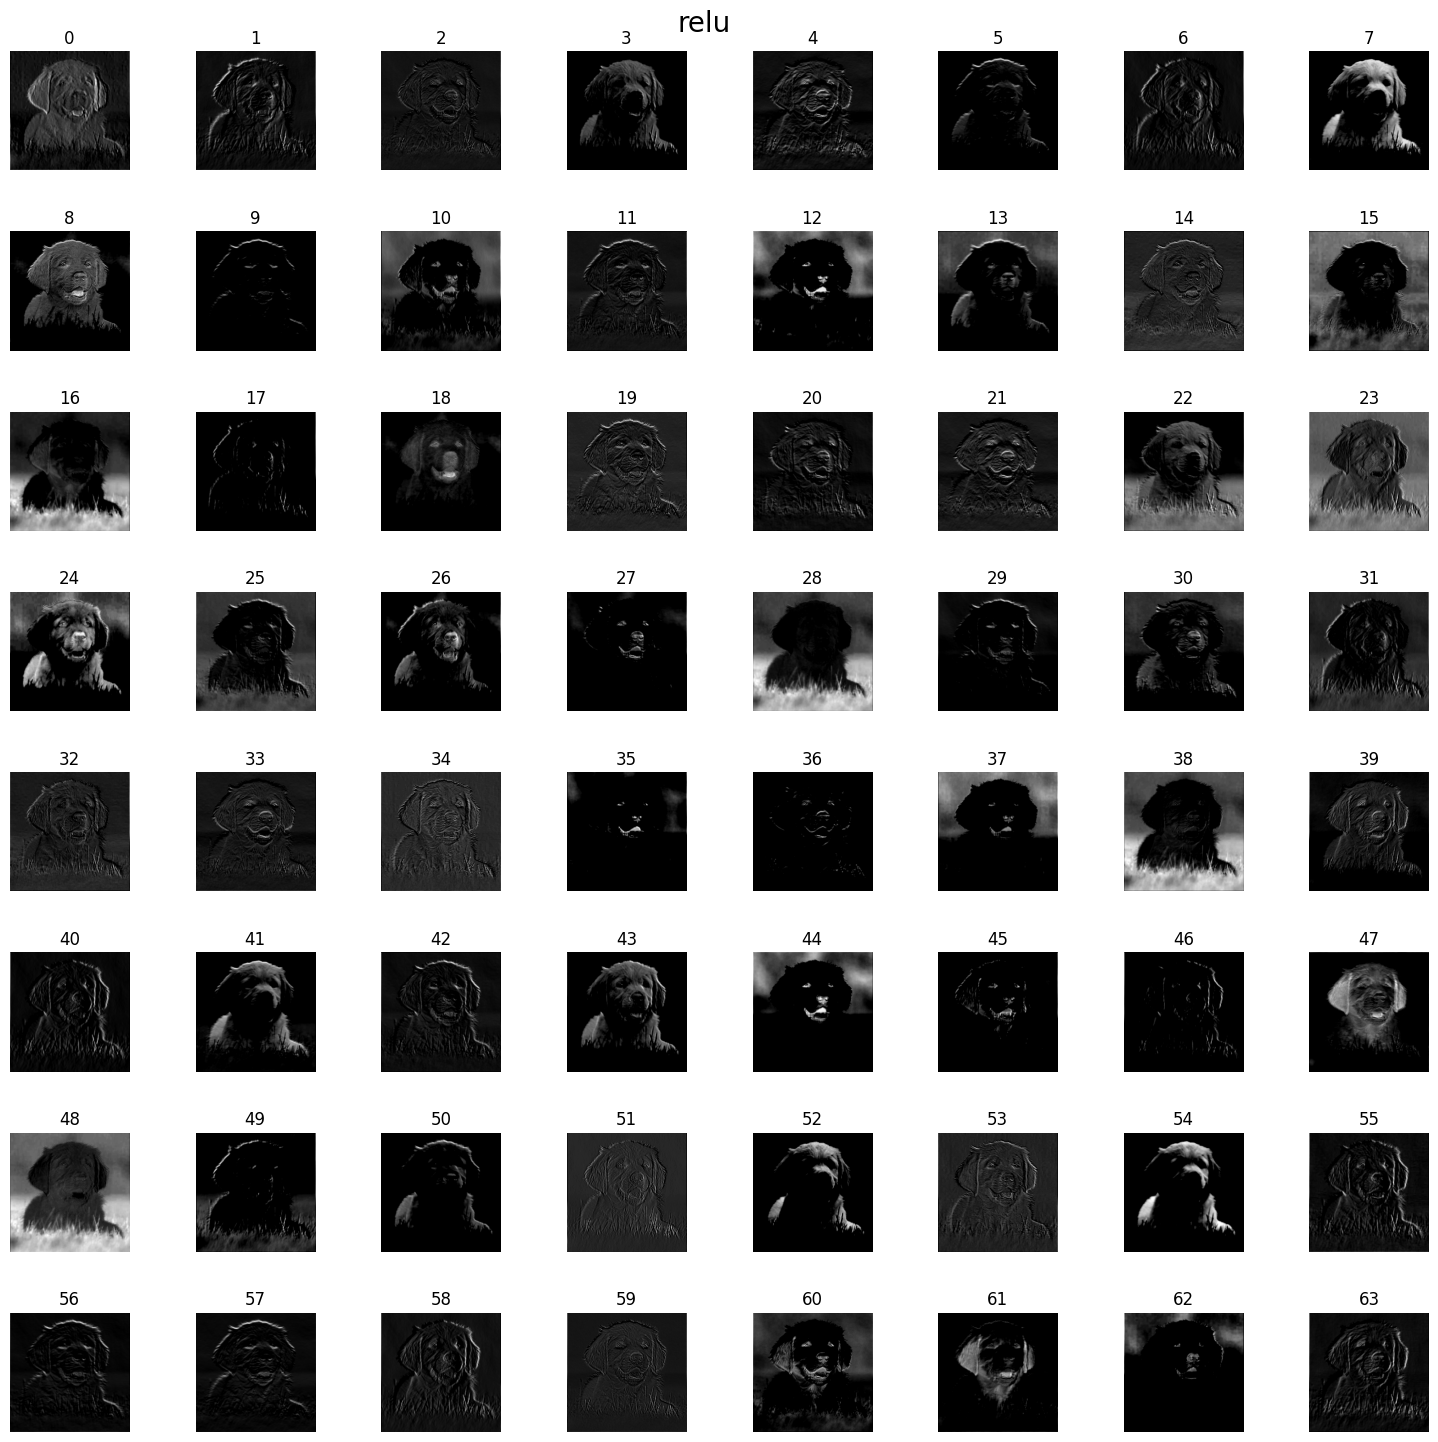

In [ ]:
### START CODE HERE ###

plot_featuremap(torch.from_numpy(np.maximum(0,conv_output.detach().numpy())), 'relu')

### END CODE HERE ###

---

# Question
1. Show the array of kernel weights used for extracting object color
and those used for extracting object edge details at least two CNN nodes.
Compare and Discuss how the specific values of these kernel weights influence the CNN's ability
<br>
to detect colors versus edges in images.
2. Why is Matplotlib able to display the output feature map from the convolution layer, even though it contains negative values?
<br>เพราะ matplotlib ได้รับค่า แล้วจึงนำไปทำ color map ทำให้สามารถรองรับจำนวนที่มีค่าต่ำกว่า 0 ได้ และปรับ สเกลให้อยู่ระหว่าง 0 -255 จึงสามารถรองรับค่าติดลบได้
3. Is there a method faster than traditional 2D convolution in the "Convolution 2D from scratch" section?
<br>ใช้ lib เช่น scipy


extracting เส้นขอบ
<br>
Kernel : 1
********************
Channel : 1
tensor([[-0.1408, -0.2190,  0.1504],[-0.8413, -0.3518,  0.5640],[-0.2419,  0.5193,  0.5391])
<br>
Kernel : 2
********************
Channel : 1
tensor([[ 0.3092,  0.6707,  0.0205],
        [-0.4661, -1.0697,  0.3350],
        [-0.0803, -0.3052,  0.5446])


extracting สี<br>
Kernel : 3
********************
Channel : 1
tensor([[-0.1789, -0.0891,  0.0468],
        [-0.2570, -0.0514,  0.0748],
        [-0.1853, -0.1181, -0.1041]])
<br>        
Kernel : 7
********************
Channel : 1
tensor([[-0.0762,  0.0907,  0.0041],
        [ 0.0624,  0.1860,  0.1073],
        [-0.0435,  0.0223,  0.0127]])


In [ ]:
จะเห็นว่าการกระจายตัวของน้ำหนักเส้นขอบมีค่ามากกว่าของสี เพราะจะสามารถตรวจจับการเปลี่ยนแปลงค่าพิกเซลได้ง่ายกว่า